# Modelling

LSTM -Neural Networks

In [2]:
import numpy as np
import seaborn as sns
import pandas as pd
import matplotlib.pyplot as plt

from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder, OrdinalEncoder, FunctionTransformer
from sklearn.preprocessing import LabelEncoder
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report , confusion_matrix
from sklearn.model_selection import train_test_split 
from sklearn.preprocessing import StandardScaler , MinMaxScaler
from sklearn.preprocessing import OneHotEncoder

In [3]:
# Import datset into data frame 

df = pd.read_excel("data (1).xlsx")

In [4]:
df.head(4)

,Region,Customer Segment,Product Category,Units Sold,Unit Price,Revenue,Profit Margin,Profit,Day,Year,Month,Month_Name,Quarter,Date Group,Profit Amount
0,East,Small Business,Electronics,9,153.73,1383.57,0.07,10.7611,1,2021,1,January,1,First week,96.8499
1,West,Small Business,Electronics,27,289.07,7804.89,0.13,37.5791,1,2021,1,January,1,First week,1014.6357
2,North,Small Business,Office Supplies,41,491.73,20160.93,0.11,54.0903,1,2021,1,January,1,First week,2217.7023
3,East,Consumer,Electronics,14,116.57,1631.98,0.11,12.8227,1,2021,1,January,1,First week,179.5178


In [5]:
# Dropping columns deemed irrelevant to the LSTM model based on domain knowledge

dfm = df.drop(['Day','Quarter', 'Date Group', 'Month_Name'] , axis=1)

dfm.head(3)

,Region,Customer Segment,Product Category,Units Sold,Unit Price,Revenue,Profit Margin,Profit,Year,Month,Profit Amount
0,East,Small Business,Electronics,9,153.73,1383.57,0.07,10.7611,2021,1,96.8499
1,West,Small Business,Electronics,27,289.07,7804.89,0.13,37.5791,2021,1,1014.6357
2,North,Small Business,Office Supplies,41,491.73,20160.93,0.11,54.0903,2021,1,2217.7023


In [6]:
dfm.head()

,Region,Customer Segment,Product Category,Units Sold,Unit Price,Revenue,Profit Margin,Profit,Year,Month,Profit Amount
0,East,Small Business,Electronics,9,153.73,1383.57,0.07,10.7611,2021,1,96.8499
1,West,Small Business,Electronics,27,289.07,7804.89,0.13,37.5791,2021,1,1014.6357
2,North,Small Business,Office Supplies,41,491.73,20160.93,0.11,54.0903,2021,1,2217.7023
3,East,Consumer,Electronics,14,116.57,1631.98,0.11,12.8227,2021,1,179.5178
4,East,Small Business,Electronics,45,493.09,22189.05,0.21,103.5489,2021,1,4659.7005


In [7]:
# One hot Features .

dfm_scaled = pd.get_dummies(dfm, columns=['Region', 'Customer Segment', 'Product Category'], drop_first=True)


In [8]:
dfm_scaled.head()

,Units Sold,Unit Price,Revenue,Profit Margin,Profit,Year,Month,Profit Amount,Region_North,Region_South,Region_West,Customer Segment_Corporate,Customer Segment_Small Business,Product Category_Furniture,Product Category_Office Supplies
0,9,153.73,1383.57,0.07,10.7611,2021,1,96.8499,False,False,False,False,True,False,False
1,27,289.07,7804.89,0.13,37.5791,2021,1,1014.6357,False,False,True,False,True,False,False
2,41,491.73,20160.93,0.11,54.0903,2021,1,2217.7023,True,False,False,False,True,False,True
3,14,116.57,1631.98,0.11,12.8227,2021,1,179.5178,False,False,False,False,False,False,False
4,45,493.09,22189.05,0.21,103.5489,2021,1,4659.7005,False,False,False,False,True,False,False


In [9]:
# Identify numerical columns
columns = ['Units Sold', 'Unit Price', 'Revenue', 'Profit Margin', 'Profit',
                     'Year', 'Month',]

# Initialize scaler
scaler = StandardScaler()

# Scale the numerical columns
dfm_scaled[columns] = scaler.fit_transform(dfm_scaled[columns])

In [10]:
dfm_scaled.head()

,Units Sold,Unit Price,Revenue,Profit Margin,Profit,Year,Month,Profit Amount,Region_North,Region_South,Region_West,Customer Segment_Corporate,Customer Segment_Small Business,Product Category_Furniture,Product Category_Office Supplies
0,-1.138777,-0.703335,-0.919267,-1.444057,-1.034315,-0.376235,-1.34109,96.8499,False,False,False,False,True,False,False
1,0.137529,0.259341,0.271804,-0.615734,-0.205103,-0.376235,-1.34109,1014.6357,False,False,True,False,True,False,False
2,1.130211,1.700865,2.563689,-0.891842,0.305423,-0.376235,-1.34109,2217.7023,True,False,False,False,True,False,True
3,-0.784247,-0.967655,-0.873190,-0.891842,-0.970570,-0.376235,-1.34109,179.5178,False,False,False,False,False,False,False
4,1.413835,1.710538,2.939878,0.488697,1.834681,-0.376235,-1.34109,4659.7005,False,False,False,False,True,False,False


In [11]:
# Convert Boolean strings into integers 

bool_columns = dfm_scaled.select_dtypes(include=['bool']).columns
dfm_scaled[bool_columns] = dfm_scaled[bool_columns].astype(int)


In [12]:
dfm_scaled.head()

,Units Sold,Unit Price,Revenue,Profit Margin,Profit,Year,Month,Profit Amount,Region_North,Region_South,Region_West,Customer Segment_Corporate,Customer Segment_Small Business,Product Category_Furniture,Product Category_Office Supplies
0,-1.138777,-0.703335,-0.919267,-1.444057,-1.034315,-0.376235,-1.34109,96.8499,0,0,0,0,1,0,0
1,0.137529,0.259341,0.271804,-0.615734,-0.205103,-0.376235,-1.34109,1014.6357,0,0,1,0,1,0,0
2,1.130211,1.700865,2.563689,-0.891842,0.305423,-0.376235,-1.34109,2217.7023,1,0,0,0,1,0,1
3,-0.784247,-0.967655,-0.873190,-0.891842,-0.970570,-0.376235,-1.34109,179.5178,0,0,0,0,0,0,0
4,1.413835,1.710538,2.939878,0.488697,1.834681,-0.376235,-1.34109,4659.7005,0,0,0,0,1,0,0


In [13]:
# Separate features and target
target_column = 'Revenue'  # Replace with your actual target column name
features = dfm_scaled.drop(columns=['Revenue' ])
target = dfm_scaled['Revenue']

target = target.values

In [14]:
features.head()

,Units Sold,Unit Price,Profit Margin,Profit,Year,Month,Profit Amount,Region_North,Region_South,Region_West,Customer Segment_Corporate,Customer Segment_Small Business,Product Category_Furniture,Product Category_Office Supplies
0,-1.138777,-0.703335,-1.444057,-1.034315,-0.376235,-1.34109,96.8499,0,0,0,0,1,0,0
1,0.137529,0.259341,-0.615734,-0.205103,-0.376235,-1.34109,1014.6357,0,0,1,0,1,0,0
2,1.130211,1.700865,-0.891842,0.305423,-0.376235,-1.34109,2217.7023,1,0,0,0,1,0,1
3,-0.784247,-0.967655,-0.891842,-0.970570,-0.376235,-1.34109,179.5178,0,0,0,0,0,0,0
4,1.413835,1.710538,0.488697,1.834681,-0.376235,-1.34109,4659.7005,0,0,0,0,1,0,0


In [15]:
# target variable 

target

array([-0.91926659,  0.27180447,  2.56368865, ...,  0.13843379,
       -0.39761793, -0.33928043])

In [16]:

# Train-test split into a 80:20 ratio
X_train, X_test, y_train, y_test = train_test_split(features, target, test_size=0.2, random_state=42)

In [17]:
X_test.head()

,Units Sold,Unit Price,Profit Margin,Profit,Year,Month,Profit Amount,Region_North,Region_South,Region_West,Customer Segment_Corporate,Customer Segment_Small Business,Product Category_Furniture,Product Category_Office Supplies
6252,0.704776,1.080823,0.212589,1.009659,-0.376235,0.852743,2690.3240,0,0,0,1,0,0,0
4684,-0.287906,1.123430,0.626751,1.425675,-0.376235,0.304285,1896.7410,0,1,0,0,0,0,0
1731,0.492058,-0.011167,0.488697,0.263004,-0.376235,-0.792632,1686.9888,0,0,0,0,0,0,1
4742,-0.146094,0.407647,1.593128,1.411940,-0.376235,0.304285,2067.1664,0,0,1,0,1,0,1
4521,-0.713341,-0.556736,-0.891842,-0.774083,-0.376235,0.304285,287.6610,0,0,0,1,0,0,1


In [18]:
X_train.head()

,Units Sold,Unit Price,Profit Margin,Profit,Year,Month,Profit Amount,Region_North,Region_South,Region_West,Customer Segment_Corporate,Customer Segment_Small Business,Product Category_Furniture,Product Category_Office Supplies
9254,0.350247,1.400980,-0.477680,0.579049,2.657916,-1.341090,1888.1940,1,0,0,1,0,0,0
1561,0.137529,-0.403877,0.626751,-0.034935,-0.376235,-0.792632,1163.2302,0,0,1,1,0,0,1
1670,-0.500624,-1.391519,0.902858,-0.944211,-0.376235,-0.792632,246.1536,0,1,0,0,1,1,0
6087,0.350247,0.215738,0.626751,0.557622,-0.376235,0.852743,1867.4040,1,0,0,0,0,0,0
6669,1.484741,1.401193,-0.615734,0.440163,-0.376235,1.126972,2688.6080,0,1,0,1,0,0,1


In [19]:



sequence_data = features # Features
target_data = target  # Target variable

# Create sequences
def create_sequences(data, target, sequence_length):
    X, y = [], []
    for i in range(len(data) - sequence_length):
        X.append(data[i:i+sequence_length])
        y.append(target[i+sequence_length])
    return np.array(X), np.array(y)

sequence_length = 50  # Adjust as needed
X_train_seq, y_train_seq = create_sequences(X_train, y_train, sequence_length)
X_test_seq, y_test_seq = create_sequences(X_test, y_test, sequence_length)

# Print shapes
print(f"Training Sequences Shape: {X_train_seq.shape}")
print(f"Training Targets Shape: {y_train_seq.shape}")


Training Sequences Shape: (7950, 50, 14)
Training Targets Shape: (7950,)


In [20]:

# Confirm The shape of the split
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((8000, 14), (2000, 14), (8000,), (2000,))

In [21]:
len(features) ==len(target)

True

In [22]:
## Defines an LSTM model with two LSTM layers, dropout for regularization, and a dense output layer.

from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense, Dropout, Input

# Define LSTM model
model = Sequential([
    Input(shape=(X_train_seq.shape[1], X_train_seq.shape[2])),  # Explicit Input layer
    LSTM(64, return_sequences=True),
    Dropout(0.2),
    LSTM(32, return_sequences=False),
    Dropout(0.2),
    Dense(1)
])

# Compile the model
model.compile(optimizer='adam', loss='mse', metrics=['mae'])

# Train the model
history = model.fit(
    X_train_seq, y_train_seq,
    validation_split=0.2,
    epochs=50,
    batch_size=32,
    verbose=1
)


Epoch 1/50
199/199 ━━━━━━━━━━━━━━━━━━━━ 22s 73ms/step - loss: 1.0072 - mae: 0.8245 - val_loss: 1.0325 - val_mae: 0.8421
Epoch 2/50
199/199 ━━━━━━━━━━━━━━━━━━━━ 14s 69ms/step - loss: 0.9728 - mae: 0.8048 - val_loss: 1.0311 - val_mae: 0.8374
Epoch 3/50
199/199 ━━━━━━━━━━━━━━━━━━━━ 14s 69ms/step - loss: 1.0178 - mae: 0.8286 - val_loss: 1.0312 - val_mae: 0.8384
Epoch 4/50
199/199 ━━━━━━━━━━━━━━━━━━━━ 14s 68ms/step - loss: 0.9811 - mae: 0.8116 - val_loss: 1.0337 - val_mae: 0.8263
Epoch 5/50
199/199 ━━━━━━━━━━━━━━━━━━━━ 14s 69ms/step - loss: 0.9757 - mae: 0.8005 - val_loss: 1.0313 - val_mae: 0.8397
Epoch 6/50
199/199 ━━━━━━━━━━━━━━━━━━━━ 14s 70ms/step - loss: 0.9948 - mae: 0.8207 - val_loss: 1.0311 - val_mae: 0.8309
Epoch 7/50
199/199 ━━━━━━━━━━━━━━━━━━━━ 14s 68ms/step - loss: 0.9890 - mae: 0.8113 - val_loss: 1.0307 - val_mae: 0.8316
Epoch 8/50
199/199 ━━━━━━━━━━━━━━━━━━━━ 14s 68ms/step - loss: 0.9854 - mae: 0.8118 - val_loss: 1.0320 - val_mae: 0.8419
Epoch 9/50
199/199 ━━━━━━━━━━━━━━━━━━━━ 

In [23]:
# Model summary
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ lstm (LSTM)                     │ (None, 50, 64)         │        20,224 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 50, 64)         │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ lstm_1 (LSTM)                   │ (None, 32)             │        12,416 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_1 (Dropout)             │ (None, 32)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 1)              │            33 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 98,021 (382.90 KB)

 Trainable params: 32,673 (127.63 KB)

 Non-trainable params: 0 (0.00 B)

 Optimizer params: 65,348 (255.27 KB)

In [24]:
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

# Predict on test data
y_pred = model.predict(X_test_seq)

# Calculate metrics
mse = mean_squared_error(y_test_seq, y_pred)
mae = mean_absolute_error(y_test_seq, y_pred)
rmse = np.sqrt(mse)
r2 = r2_score(y_test_seq, y_pred)

print(f"MSE: {mse}")
print(f"MAE: {mae}")
print(f"RMSE: {rmse}")
print(f"R²: {r2}")

61/61 ━━━━━━━━━━━━━━━━━━━━ 2s 25ms/step
MSE: 1.0403352258176572
MAE: 0.8232896326325206
RMSE: 1.0199682474556044
R²: -0.04574133162498084


In [25]:
from kerastuner.tuners import RandomSearch
from tensorflow.keras.optimizers import Adam

# Define the model with hyperparameters
def build_model(hp):
    model = Sequential()
    model.add(LSTM(
        units=hp.Int('units', min_value=32, max_value=256, step=32),
        return_sequences=True,
        input_shape=(X_train_seq.shape[1], X_train_seq.shape[2])
    ))
    model.add(Dropout(hp.Float('dropout', 0.2, 0.5, step=0.1)))
    model.add(LSTM(units=hp.Int('units_2', min_value=32, max_value=128, step=32), return_sequences=False))
    model.add(Dropout(hp.Float('dropout_2', 0.2, 0.5, step=0.1)))
    model.add(Dense(1))
    model.compile(
        optimizer=Adam(learning_rate=hp.Float('learning_rate', 1e-4, 1e-2, sampling='log')),
        loss='mse',
        metrics=['mae']
    )
    return model

# Initialize the tuner
tuner = RandomSearch(
    build_model,
    objective='val_loss',
    max_trials=10,
    executions_per_trial=1,
    directory='hyperparameter_tuning',
    project_name='lstm_tuning'
)

# Perform the search
tuner.search(X_train_seq, y_train_seq, epochs=50, validation_split=0.2, batch_size=32)

# Get the best hyperparameters
best_hps = tuner.get_best_hyperparameters(num_trials=1)[0]
print(best_hps.values)


Reloading Tuner from hyperparameter_tuning\lstm_tuning\tuner0.json
{'units': 224, 'dropout': 0.2, 'add_second_layer': True, 'dense_units': 32, 'learning_rate': 0.004082969341851442, 'units_2': 32, 'dropout_2': 0.2}


C:\Users\Ndumbi Kimani\AppData\Local\Temp\ipykernel_8360\3525584515.py:1: DeprecationWarning: `import kerastuner` is deprecated, please use `import keras_tuner`.
  from kerastuner.tuners import RandomSearch


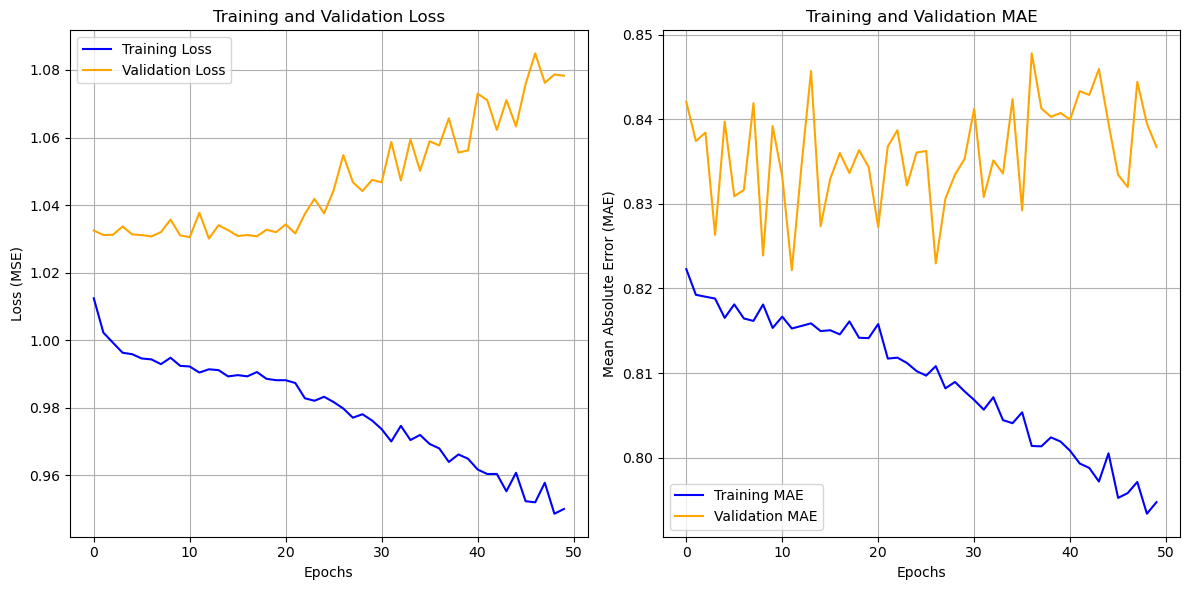

In [26]:
import matplotlib.pyplot as plt

# Plot training and validation loss and MAE
def plot_training_history(history):
    plt.figure(figsize=(12, 6))

    # Plot Loss
    plt.subplot(1, 2, 1)
    plt.plot(history.history['loss'], label='Training Loss', color='blue')
    plt.plot(history.history['val_loss'], label='Validation Loss', color='orange')
    plt.title('Training and Validation Loss')
    plt.xlabel('Epochs')
    plt.ylabel('Loss (MSE)')
    plt.legend()
    plt.grid()

    # Plot MAE
    plt.subplot(1, 2, 2)
    plt.plot(history.history['mae'], label='Training MAE', color='blue')
    plt.plot(history.history['val_mae'], label='Validation MAE', color='orange')
    plt.title('Training and Validation MAE')
    plt.xlabel('Epochs')
    plt.ylabel('Mean Absolute Error (MAE)')
    plt.legend()
    plt.grid()

    plt.tight_layout()
    plt.show()

# Call the function with the history object
plot_training_history(history)


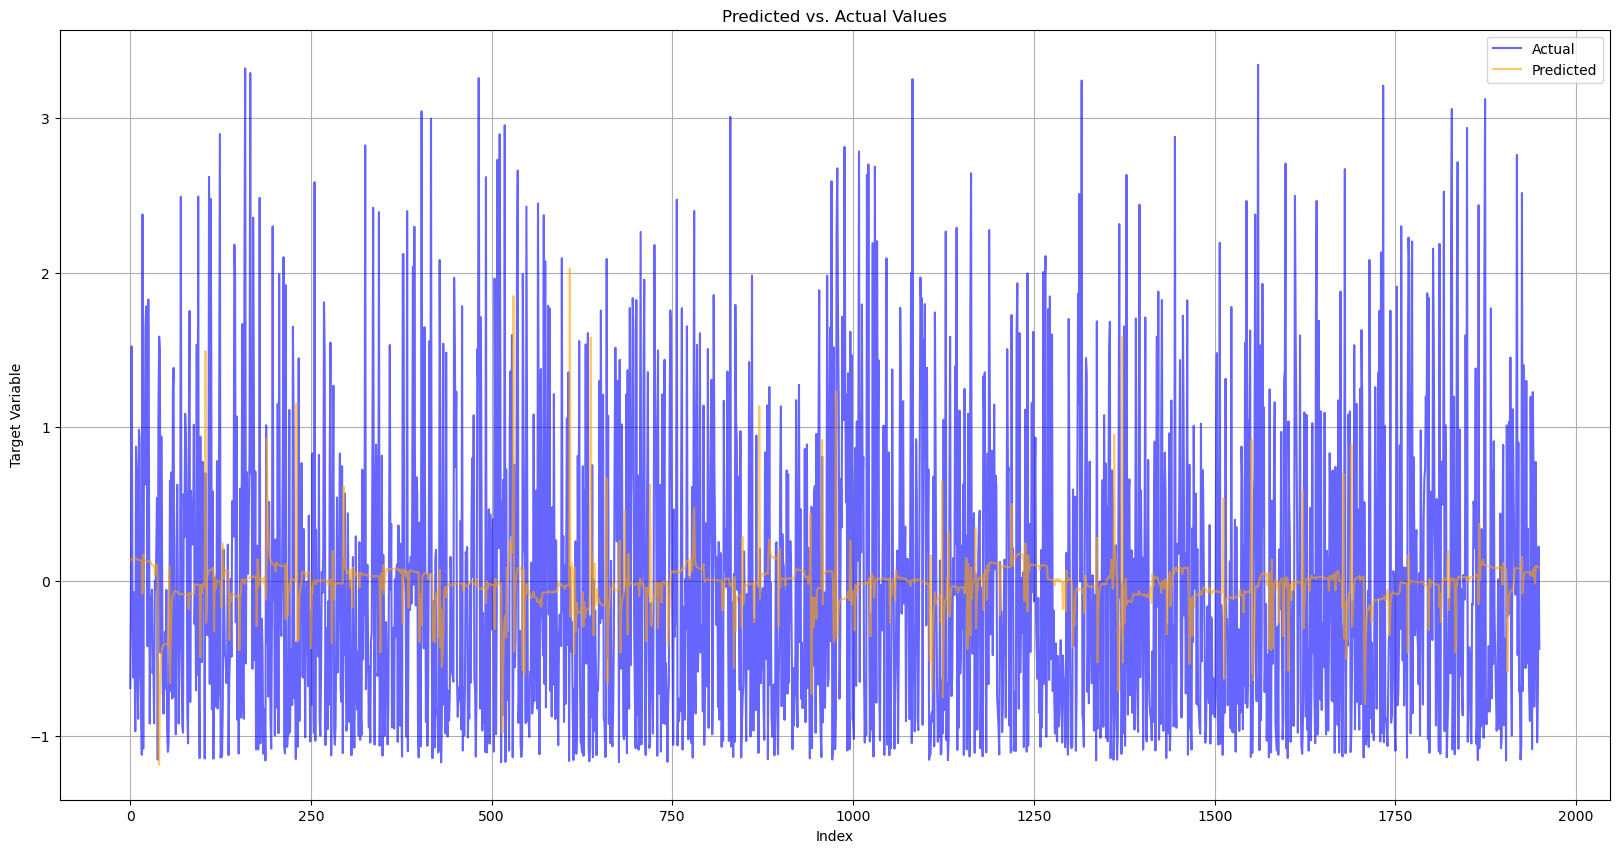

In [27]:
# Plot Predicted vs Actual values
def plot_predictions(y_test, y_pred):
    plt.figure(figsize=(20, 10))
    plt.plot(y_test, label='Actual', color='blue', alpha=0.6)
    plt.plot(y_pred, label='Predicted', color='orange', alpha=0.6)
    plt.title('Predicted vs. Actual Values')
    plt.xlabel('Index')
    plt.ylabel('Target Variable')
    plt.legend()
    plt.grid()
    plt.show()

# Reshape predictions if needed and call the function
plot_predictions(y_test_seq, y_pred.flatten())


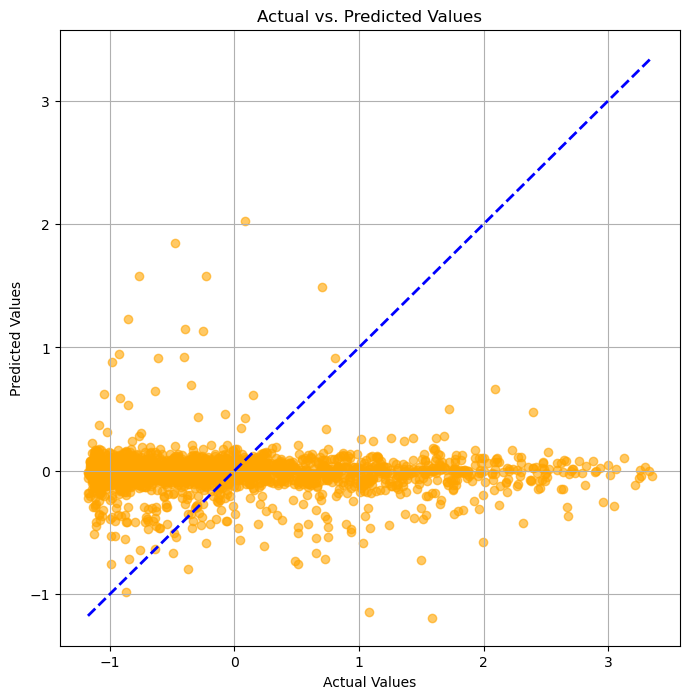

In [28]:
# Scatter plot of actual vs predicted
def scatter_actual_vs_predicted(y_test, y_pred):
    plt.figure(figsize=(8, 8))
    plt.scatter(y_test, y_pred, alpha=0.6, color='orange')
    plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], color='blue', linestyle='--', linewidth=2)
    plt.title('Actual vs. Predicted Values')
    plt.xlabel('Actual Values')
    plt.ylabel('Predicted Values')
    plt.grid()
    plt.show()

# Call the function
scatter_actual_vs_predicted(y_test_seq, y_pred.flatten())


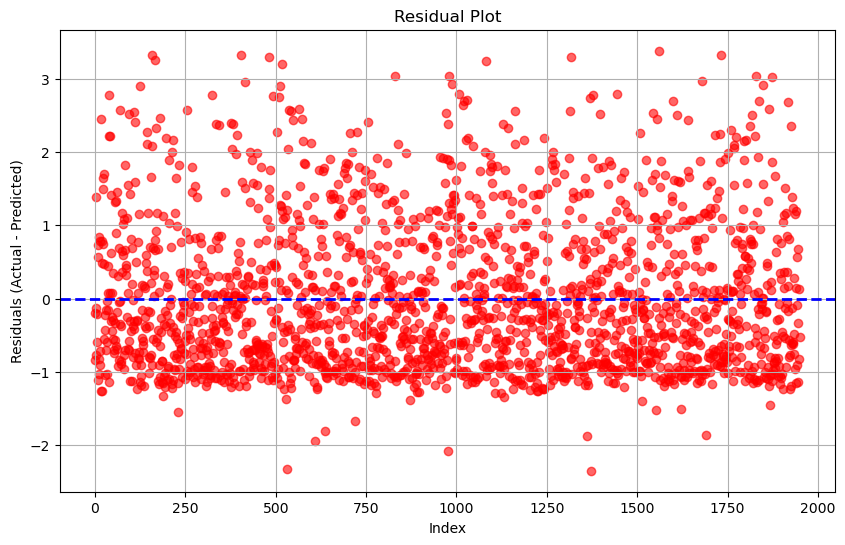

In [29]:
# Residual plot
def plot_residuals(y_test, y_pred):
    residuals = y_test - y_pred.flatten()
    plt.figure(figsize=(10, 6))
    plt.scatter(range(len(residuals)), residuals, alpha=0.6, color='red')
    plt.axhline(0, color='blue', linestyle='--', linewidth=2)
    plt.title('Residual Plot')
    plt.xlabel('Index')
    plt.ylabel('Residuals (Actual - Predicted)')
    plt.grid()
    plt.show()

# Call the function
plot_residuals(y_test_seq, y_pred)


In [30]:
import tensorflow as tf  # Import TensorFlow

# Build the best model from tuner results
best_model = tuner.hypermodel.build(best_hps)

# Train the best model using sequence data
history = best_model.fit(
    X_train_seq, y_train_seq,  # Training sequences and targets
    validation_data=(X_test_seq, y_test_seq),  # Validation sequences and targets
    epochs=100,
    batch_size=32,
    callbacks=[
        tf.keras.callbacks.EarlyStopping(monitor='val_loss', patience=10)
    ]
)

# Evaluate the best model on the test data
loss, mae = best_model.evaluate(X_test_seq, y_test_seq, verbose=0)
print(f"Test Loss (MSE): {loss}")
print(f"Test MAE: {mae}")

# Predict on the test set
y_pred = best_model.predict(X_test_seq)

# Calculate additional metrics: RMSE and R²
from sklearn.metrics import mean_squared_error, r2_score
import numpy as np

mse = mean_squared_error(y_test_seq, y_pred)
rmse = np.sqrt(mse)
r2 = r2_score(y_test_seq, y_pred)

print(f"Test RMSE: {rmse}")
print(f"Test R²: {r2}")


C:\Users\Ndumbi Kimani\anaconda3\Lib\site-packages\keras\src\layers\rnn\rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Epoch 1/100
249/249 ━━━━━━━━━━━━━━━━━━━━ 52s 189ms/step - loss: 1.0948 - mae: 0.8501 - val_loss: 0.9948 - val_mae: 0.8114
Epoch 2/100
249/249 ━━━━━━━━━━━━━━━━━━━━ 35s 142ms/step - loss: 1.0055 - mae: 0.8219 - val_loss: 0.9949 - val_mae: 0.8103
Epoch 3/100
249/249 ━━━━━━━━━━━━━━━━━━━━ 35s 141ms/step - loss: 1.0189 - mae: 0.8274 - val_loss: 0.9949 - val_mae: 0.8113
Epoch 4/100
249/249 ━━━━━━━━━━━━━━━━━━━━ 36s 144ms/step - loss: 0.9970 - mae: 0.8188 - val_loss: 0.9950 - val_mae: 0.8095
Epoch 5/100
249/249 ━━━━━━━━━━━━━━━━━━━━ 35s 142ms/step - loss: 1.0066 - mae: 0.8230 - val_loss: 0.9949 - val_mae: 0.8098
Epoch 6/100
249/249 ━━━━━━━━━━━━━━━━━━━━ 36s 143ms/step - loss: 0.9855 - mae: 0.8152 - val_loss: 0.9951 - val_mae: 0.8142
Epoch 7/100
249/249 ━━━━━━━━━━━━━━━━━━━━ 36s 143ms/step - loss: 0.9952 - mae: 0.8191 - val_loss: 0.9949 - val_mae: 0.8120
Epoch 8/100
249/249 ━━━━━━━━━━━━━━━━━━━━ 44s 177ms/step - loss: 0.9969 - mae: 0.8175 - val_loss: 0.9951 - val_mae: 0.8144
Epoch 9/100
249/249 ━━━━

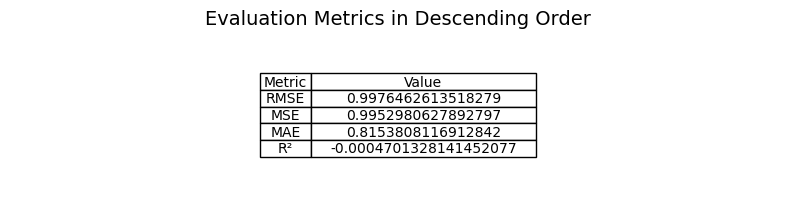

In [31]:
import pandas as pd
import matplotlib.pyplot as plt

# Assume metrics have been calculated
metrics = {
    "Metric": ["MSE", "MAE", "RMSE", "R²"],
    "Value": [mse, mae, rmse, r2]
}

# Create a DataFrame from the metrics dictionary
metrics_df = pd.DataFrame(metrics)

# Sort the DataFrame in descending order of 'Value'
metrics_df = metrics_df.sort_values(by="Value", ascending=False)

# Plot the table
def plot_metrics_table(df):
    fig, ax = plt.subplots(figsize=(10, 2))  # Adjust figure size as needed
    ax.axis('tight')
    ax.axis('off')
    table = plt.table(
        cellText=df.values,
        colLabels=df.columns,
        cellLoc='center',
        loc='center',
        colWidths=[0.5, 0.5]
    )
    table.auto_set_font_size(False)
    table.set_fontsize(10)
    table.auto_set_column_width(col=list(range(len(df.columns))))
    plt.title("Evaluation Metrics in Descending Order", fontsize=14, pad=10)
    plt.show()

# Call the function to display the table
plot_metrics_table(metrics_df)


In [48]:
def add_lag_features(data, lags):
    """
    Add lag features to the dataset.
    Args:
        data: Original DataFrame.
        lags: Number of lags to add.
    Returns:
        DataFrame with lag features added.
    """
    for lag in range(1, lags + 1):
        dfm_scaled[f'lag_{lag}'] = dfm_scaled['Revenue'].shift(lag)
    return data

# Add lag features
lags = 3  # Example: Add 3 lagged features
data_with_lags = add_lag_features(df, lags)
data_with_lags.dropna(inplace=True)  # Drop rows with NaN due to lagging


In [50]:
from keras_tuner.tuners import RandomSearch
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense, Dropout

def build_model(hp):
    model = Sequential([
        LSTM(
            hp.Int('units', min_value=32, max_value=128, step=32),
            input_shape=(X_train_seq.shape[1], X_train_seq.shape[2]),
            return_sequences=True
        ),
        Dropout(hp.Float('dropout_rate', min_value=0.1, max_value=0.5, step=0.1)),
        LSTM(
            hp.Int('units_2', min_value=16, max_value=64, step=16),
            return_sequences=False
        ),
        Dropout(hp.Float('dropout_rate_2', min_value=0.1, max_value=0.5, step=0.1)),
        Dense(1)
    ])
    model.compile(
        optimizer=hp.Choice('optimizer', values=['adam', 'rmsprop']),
        loss='mse',
        metrics=['mae']
    )
    return model

# Initialize tuner
tuner = RandomSearch(
    build_model,
    objective='val_loss',
    max_trials=10,
    executions_per_trial=2,
    directory='hyperparam_tuning',
    project_name='lstm_tuning'
)

# Start tuning
tuner.search(X_train_seq, y_train_seq, epochs=50, validation_split=0.2, verbose=1)
best_hps = tuner.get_best_hyperparameters(num_trials=1)[0]


Trial 10 Complete [00h 15m 13s]
val_loss: 1.03098464012146

Best val_loss So Far: 1.0293483138084412
Total elapsed time: 17h 31m 10s


In [51]:
from tensorflow.keras.layers import Bidirectional

model = Sequential([
    Bidirectional(LSTM(64, return_sequences=True), input_shape=(X_train_seq.shape[1], X_train_seq.shape[2])),
    Dropout(0.2),
    LSTM(32, return_sequences=False),
    Dropout(0.2),
    Dense(1)
])
model.compile(optimizer='adam', loss='mse', metrics=['mae'])


C:\Users\Ndumbi Kimani\anaconda3\Lib\site-packages\keras\src\layers\rnn\bidirectional.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


61/61 ━━━━━━━━━━━━━━━━━━━━ 2s 20ms/step
MSE: 1.483776662246533
MAE: 0.8632347781731418
RMSE: 1.2181037157182195
R²: -0.4914871131007159


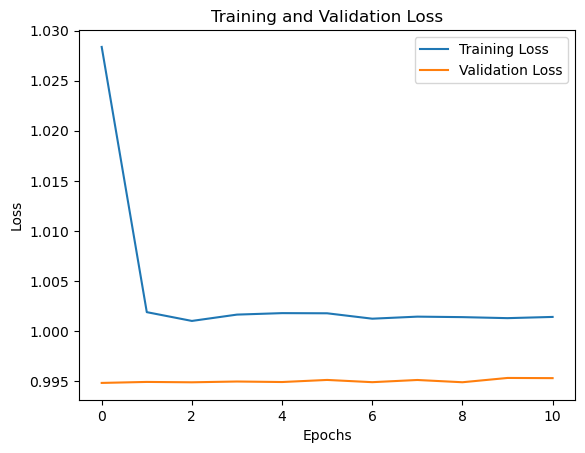

In [52]:
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
import numpy as np

# Evaluate the model on test data
predictions = model.predict(X_test_seq)
mse = mean_squared_error(y_test_seq, predictions)
mae = mean_absolute_error(y_test_seq, predictions)
rmse = np.sqrt(mse)
r2 = r2_score(y_test_seq, predictions)

print(f"MSE: {mse}")
print(f"MAE: {mae}")
print(f"RMSE: {rmse}")
print(f"R²: {r2}")

# Plot Training and Validation Loss
import matplotlib.pyplot as plt

plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Training and Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()
